# Задание
Основные цели этого задания:

* Научиться работать с новыми моделями: случайный лес, градиентный бустинг.

* Научиться распознавать факты переобучения и недообучения модели.

* Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров.

Задача:

Построить модель машинного обучения, предсказывающую, является ли вино красным по одиннадцати его характеристикам.

План решения:

    1. Загрузите данные, объедините источники в один датафрейм. Составьте целевую переменную на основе файла, из которого вы получили часть данных, изучите распределение по ней. Проверьте отсутствие пропусков в данных, отделите фичи и целевой признак друг от друга, разделите данные на обучающую и валидационную части.

    2. Поскольку выборка несбалансирована, воспользуемся для оценки качества модели новой метрикой balanced_accuracy_score. Изучите формулу расчета метрики в документации и реализуйте функцию balanced_accuracy_score_my для ее расчета. На вход она должна принимать правильные и прогнозные метки классов, а возвращать число от 0 до 1. Убедитесь, что вы корректно реализовали расчет, сравнив значения, получаемые библиотечной реализацией и собственной, подавая на вход векторы:
    y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
    y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

    3.Подберите лучшую модель решающего дерева:

        a. Переберите несколько значений какого-либо гиперпараметра, отвечающего за сложность дерева, для каждого значения оцените качество на обучающей и валидационной частях

        b. Визуализируйте зависимость качества модели от значения гиперпараметров. Опишите зоны недообучения и переобучения, если вы их наблюдаете.

        c. Выведите значение гиперпараметра, при котором качество модели на валидационной части наилучшее.

    4. Подберите лучшую модель случайного леса:

        a. Переберите несколько значений какого-либо гиперпараметра дерева и для каждого из них — несколько значений гиперпараметра, отвечающего за количество решающих деревьев в случайном лесу. Для каждой комбинации гиперпараметров оцените качество на валидационной части.

        b. Визуализируйте зависимость качества модели от значений гиперпараметров с помощью функции imshow. Опишите особенности, которые вы наблюдаете.

        c. Выведите значения гиперпараметров, при которых качество модели на валидационной части выборки наилучшее.

    5. Подберите лучший вариант градиентного бустинга:

        a. Выделите из обучающей части данных часть для валидации градиентного бустинга в ходе обучения.

        b. Зафиксируйте небольшое количество деревьев, значение какого-либо параметра, отвечающего за сложность решающих деревьев и значение величины шага градиентного бустинга. Обучите градиентный бустинг с выбранными параметрами, выводя в процессе обучения значение функции потерь на обучающей и валидационной частях. Выведите значение метрики качества на экран.

        c. На фиксированном небольшом количестве деревьев сравните 3-4 комбинации значений параметров величины шага градиентного бустинга и какого-либо параметра, отвечающего за сложность решающих деревьев.

        d. Выберите из рассмотренных комбинаций лучшую и обоснуйте свой выбор.

        e. Увеличьте количество деревьев и опишите эффект. Изучите значение гиперпараметра early_stopping_rounds и воспользуйтесь им, чтобы сэкономить время, войдя в переобучение модели.

    6. В выводах напишите, какая модель показала себя лучше всего, какого качества удалось достичь.

In [1]:
# Имрорт нужных библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, balanced_accuracy_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import numpy as np

# 1. Загрузите данные, объедините источники в один датафрейм. 
Составьте целевую переменную на основе файла, из которого вы получили часть данных, изучите распределение по ней. Проверьте отсутствие пропусков в данных, отделите фичи и целевой признак друг от друга, разделите данные на обучающую и валидационную части.

In [2]:
# 1-ая часть датафрейма(красные вина)
df_r = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Общая информация по красным
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Промежуточный вывод: пропусков нет, все значения(признаки) количественные

In [5]:
# 2-ая часть датафрейма(белые вина)
df_w = pd.read_csv('winequality-white.csv', sep=';')

In [6]:
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Общая информация по белым
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<div class="alert alert-info">
    
Добавим еще столбцы на понимание того, что у нас красное или белое вино

In [8]:
df_r['red_wine'] = 1
df_w['red_wine'] = 0

Промежуточный вывод: пропусков нет, все значения(признаки) количественные

In [9]:
# объединяем датафреймы
frames = [df_r, df_w]
df_r_w = pd.concat(frames)

Проверяем наш датафрейм

In [10]:
df_r_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Все в порядке за исключением одного момента: Сейчас у нас УСЛОВНО СВЕРХУ находятся красные вина, а СНИЗУ белые, 
что плохо скажется при разбиении сета на выборки(тестовую и проверочную) 

In [11]:
df_r_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [12]:
df_r_w.shape

(6497, 13)

Тосуем данные)

In [13]:
df_r_w = df_r_w.sample(frac=1).reset_index(drop=True)

In [14]:
df_r_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.5,0.330,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,0
1,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6,1
2,8.3,0.330,0.42,2.3,0.070,9.0,20.0,0.99426,3.38,0.77,12.7,7,1
3,7.5,0.570,0.08,2.6,0.089,14.0,27.0,0.99592,3.30,0.59,10.4,6,1
4,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.99820,3.37,0.49,9.4,5,1


In [15]:
df_r_w.red_wine.value_counts()

0    4898
1    1599
Name: red_wine, dtype: int64

Вот теперь больше подходит для наших задач. Разбиваем данные на выборки:

In [16]:
# определение переменных-предикторов и переменной ответа
X = df_r_w.drop(['red_wine'], axis=1)
y = df_r_w['red_wine']

In [17]:
# разделение набора данных на обучающий и тестовые наборы (Для начала так, как это было на уроке)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Поскольку выборка несбалансирована, воспользуемся для оценки качества модели новой метрикой balanced_accuracy_score. 
Изучите формулу расчета метрики в документации и реализуйте функцию balanced_accuracy_score_my для ее расчета. На вход она должна принимать правильные и прогнозные метки классов, а возвращать число от 0 до 1. Убедитесь, что вы корректно реализовали расчет, сравнив значения, получаемые библиотечной реализацией и собственной, подавая на вход векторы:
    y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
    y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

In [18]:
def balanced_accuracy_score_my(y_true, y_pred):
    TP_FN = 0
    TN_FP = 0
    for i in y_true:
        if i == 1:
            TP_FN += 1
        else:
            TN_FP += 1
        
    TP = 0
    TN = 0
    for i, j in zip(y_true, y_pred):
        if i == j == 1:
            TP += 1
        elif i == j == 0:
            TN += 1
        else:
            pass
        
    result = 1 / 2 * (TP / TP_FN + TN / TN_FP)
    return result
        



In [19]:
y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

In [20]:
balanced_accuracy_score_my(y_true, y_pred) # наша 

0.6071428571428572

In [21]:
balanced_accuracy_score(y_true, y_pred) # библиотечная 

0.6071428571428572

# 3. Подберите лучшую модель решающего дерева:
        a. Переберите несколько значений какого-либо гиперпараметра, отвечающего за сложность дерева, для каждого значения оцените качество на обучающей и валидационной частях
        b. Визуализируйте зависимость качества модели от значения гиперпараметров. Опишите зоны недообучения и переобучения, если вы их наблюдаете.
        c. Выведите значение гиперпараметра, при котором качество модели на валидационной части наилучшее.

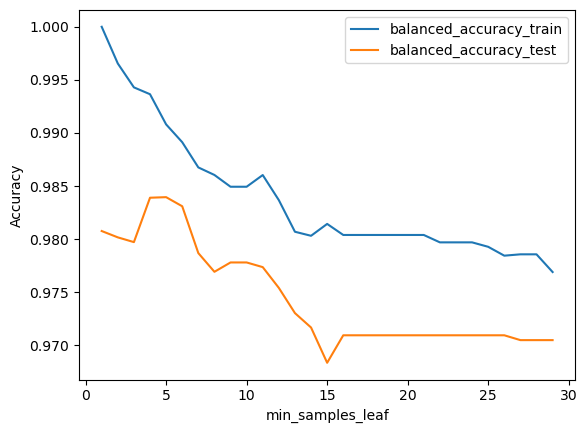

In [22]:
res = []
for param in range(1, 30):
    model = DecisionTreeClassifier(min_samples_leaf=param, random_state=42)

    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    res.append([param, balanced_accuracy_score(pred_train, y_train), balanced_accuracy_score(pred_test, y_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'balanced_accuracy_train', 'balanced_accuracy_test'])

res_pd.set_index('min_samples_leaf')['balanced_accuracy_train'].plot(label='balanced_accuracy_train')
res_pd.set_index('min_samples_leaf')['balanced_accuracy_test'].plot(label='balanced_accuracy_test')
plt.legend()
plt.ylabel('Accuracy');

In [23]:
res_pd[res_pd['balanced_accuracy_test'] == res_pd['balanced_accuracy_test'].max()]

,min_samples_leaf,balanced_accuracy_train,balanced_accuracy_test
4,5,0.990809,0.983957


Модель недоучилась, тк качество модели при тестовых заметно ниже, чем при тренировочных.
При min_samples_leaf = 5 самая высокая точность)

# 4. Подберите лучшую модель случайного леса:

    a. Переберите несколько значений какого-либо гиперпараметра дерева и для каждого из них — несколько значений гиперпараметра, отвечающего за количество решающих деревьев в случайном лесу. Для каждой комбинации гиперпараметров оцените качество на валидационной части.

    b. Визуализируйте зависимость качества модели от значений гиперпараметров с помощью функции imshow. Опишите особенности, которые вы наблюдаете.

    c. Выведите значения гиперпараметров, при которых качество модели на валидационной части выборки наилучшее.

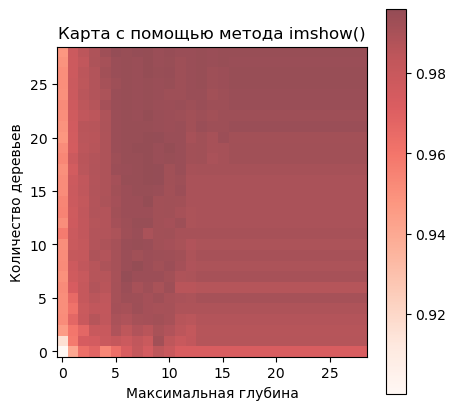

In [24]:
res = []
for n_tree in range(1, 30):
    for max_depth in range(1, 30):
        model = RandomForestClassifier(n_estimators=n_tree, min_samples_leaf=3, random_state=7, max_depth=max_depth)

        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        res.append([n_tree, max_depth, balanced_accuracy_score(pred_train, y_train), balanced_accuracy_score(pred_test, y_test)])

    res_pd = pd.DataFrame(res, columns=['n_tree', 'max_depth', 'balanced_accuracy_train', 'balanced_accuracy_test'])

plt.figure(figsize=(5, 5))
plt.imshow(res_pd.pivot(index='n_tree', columns='max_depth', values='balanced_accuracy_test'), cmap ="Reds", alpha = 0.7, aspect='equal', origin='lower')  
plt.title('Карта с помощью метода imshow()')
plt.ylabel('Количество деревьев')
plt.xlabel('Максимальная глубина')
plt.colorbar()


In [25]:
res_pd[res_pd['balanced_accuracy_test'] == res_pd['balanced_accuracy_test'].max()]

,n_tree,max_depth,balanced_accuracy_train,balanced_accuracy_test
239,9,8,0.997681,0.995897
414,15,9,0.997681,0.995897
472,17,9,0.997951,0.995897
501,18,9,0.998242,0.995897
530,19,9,0.998242,0.995897
558,20,8,0.997816,0.995897
559,20,9,0.998377,0.995897
561,20,11,0.997816,0.995897
588,21,9,0.998377,0.995897
646,23,9,0.998377,0.995897


При значении при максимальной глубине на 11 на 13 дере самая высокая точность 

# 5. Подберите лучший вариант градиентного бустинга:

        a. Выделите из обучающей части данных часть для валидации градиентного бустинга в ходе обучения.

        b. Зафиксируйте небольшое количество деревьев, значение какого-либо параметра, отвечающего за сложность решающих деревьев и значение величины шага градиентного бустинга. Обучите градиентный бустинг с выбранными параметрами, выводя в процессе обучения значение функции потерь на обучающей и валидационной частях. Выведите значение метрики качества на экран.

        c. На фиксированном небольшом количестве деревьев сравните 3-4 комбинации значений параметров величины шага градиентного бустинга и какого-либо параметра, отвечающего за сложность решающих деревьев.

        d. Выберите из рассмотренных комбинаций лучшую и обоснуйте свой выбор.

        e. Увеличьте количество деревьев и опишите эффект. Изучите значение гиперпараметра early_stopping_rounds и воспользуйтесь им, чтобы сэкономить время, войдя в переобучение модели.

In [26]:
X_train_xgb, X_val, y_train_xgb, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [27]:
model = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=5)

model.fit(X_train_xgb, y_train_xgb, eval_set=[(X_train_xgb, y_train_xgb), (X_val, y_val)])
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f'Точность тренировочной: {balanced_accuracy_score(pred_train, y_train)}')
print(f'Точность тестовой: {balanced_accuracy_score(pred_test, y_test)}')

[0]	validation_0-logloss:0.04307	validation_1-logloss:0.17063
[1]	validation_0-logloss:0.66255	validation_1-logloss:0.80332
[2]	validation_0-logloss:1.01116	validation_1-logloss:1.02102
[3]	validation_0-logloss:8.60138	validation_1-logloss:7.07220
[4]	validation_0-logloss:1.82301	validation_1-logloss:2.01668
[5]	validation_0-logloss:1.82301	validation_1-logloss:2.01668
[6]	validation_0-logloss:1.82301	validation_1-logloss:2.01668
[7]	validation_0-logloss:1.82301	validation_1-logloss:2.01668
[8]	validation_0-logloss:1.82301	validation_1-logloss:2.01668
[9]	validation_0-logloss:1.82301	validation_1-logloss:2.01668
Точность тренировочной: 0.9305983611035078
Точность тестовой: 0.9269793567314228


Как мы точность модели КРАЙНЕ МАЛА, потому что она у нас недоообученная). А что будет, если мы поставим шаг по-меньше?

In [28]:
model = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=0.1)

model.fit(X_train_xgb, y_train_xgb, eval_set=[(X_train_xgb, y_train_xgb), (X_val, y_val)])
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f'Точность тренировочной: {balanced_accuracy_score(pred_train, y_train)}')
print(f'Точность тестовой: {balanced_accuracy_score(pred_test, y_test)}')

[0]	validation_0-logloss:0.60178	validation_1-logloss:0.60427
[1]	validation_0-logloss:0.52697	validation_1-logloss:0.53158
[2]	validation_0-logloss:0.46420	validation_1-logloss:0.47071
[3]	validation_0-logloss:0.41109	validation_1-logloss:0.41965
[4]	validation_0-logloss:0.36555	validation_1-logloss:0.37595
[5]	validation_0-logloss:0.32660	validation_1-logloss:0.33877
[6]	validation_0-logloss:0.29224	validation_1-logloss:0.30578
[7]	validation_0-logloss:0.26232	validation_1-logloss:0.27725
[8]	validation_0-logloss:0.23574	validation_1-logloss:0.25230
[9]	validation_0-logloss:0.21252	validation_1-logloss:0.23044
Точность тренировочной: 0.9930695812381387
Точность тестовой: 0.9856036279303606


Точность стала гараздо выше)

А теперь... Поиграемся с колиством деревьев и параметром early_stopping_rounds. 
Это метод, используемый для остановки обучения, 
когда потери в наборе данных проверки начинают увеличиваться (в случае минимизации потерь). 
Вот почему для обучения модели (любой модели, не только Xgboost) вам нужны два отдельных набора данных

In [29]:
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], early_stopping_rounds=20, verbose=True)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f'Точность тренировочной: {balanced_accuracy_score(pred_train, y_train)}')
print(f'Точность тестовой: {balanced_accuracy_score(pred_test, y_test)}')

[0]	validation_0-logloss:0.60206	validation_1-logloss:0.60265
[1]	validation_0-logloss:0.52742	validation_1-logloss:0.52838
[2]	validation_0-logloss:0.46502	validation_1-logloss:0.46637
[3]	validation_0-logloss:0.41210	validation_1-logloss:0.41404
[4]	validation_0-logloss:0.36658	validation_1-logloss:0.36899
[5]	validation_0-logloss:0.32716	validation_1-logloss:0.32977
[6]	validation_0-logloss:0.29261	validation_1-logloss:0.29561
[7]	validation_0-logloss:0.26240	validation_1-logloss:0.26524
[8]	validation_0-logloss:0.23579	validation_1-logloss:0.23854
[9]	validation_0-logloss:0.21239	validation_1-logloss:0.21507
[10]	validation_0-logloss:0.19195	validation_1-logloss:0.19481
[11]	validation_0-logloss:0.17386	validation_1-logloss:0.17688
[12]	validation_0-logloss:0.15784	validation_1-logloss:0.16114
[13]	validation_0-logloss:0.14337	validation_1-logloss:0.14661
[14]	validation_0-logloss:0.13055	validation_1-logloss:0.13393
[15]	validation_0-logloss:0.11883	validation_1-logloss:0.12211
[1

C:\Users\Евгений\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-logloss:0.02088	validation_1-logloss:0.02279
[38]	validation_0-logloss:0.01957	validation_1-logloss:0.02146
[39]	validation_0-logloss:0.01835	validation_1-logloss:0.02008
[40]	validation_0-logloss:0.01726	validation_1-logloss:0.01885
[41]	validation_0-logloss:0.01625	validation_1-logloss:0.01781
[42]	validation_0-logloss:0.01531	validation_1-logloss:0.01681
[43]	validation_0-logloss:0.01443	validation_1-logloss:0.01600
[44]	validation_0-logloss:0.01367	validation_1-logloss:0.01518
[45]	validation_0-logloss:0.01289	validation_1-logloss:0.01441
[46]	validation_0-logloss:0.01218	validation_1-logloss:0.01364
[47]	validation_0-logloss:0.01153	validation_1-logloss:0.01293
[48]	validation_0-logloss:0.01090	validation_1-logloss:0.01228
[49]	validation_0-logloss:0.01036	validation_1-logloss:0.01176
[50]	validation_0-logloss:0.00984	validation_1-logloss:0.01117
[51]	validation_0-logloss:0.00935	validation_1-logloss:0.01058
[52]	validation_0-logloss:0.00889	validation_1-logloss:

In [30]:
results = model.evals_result()

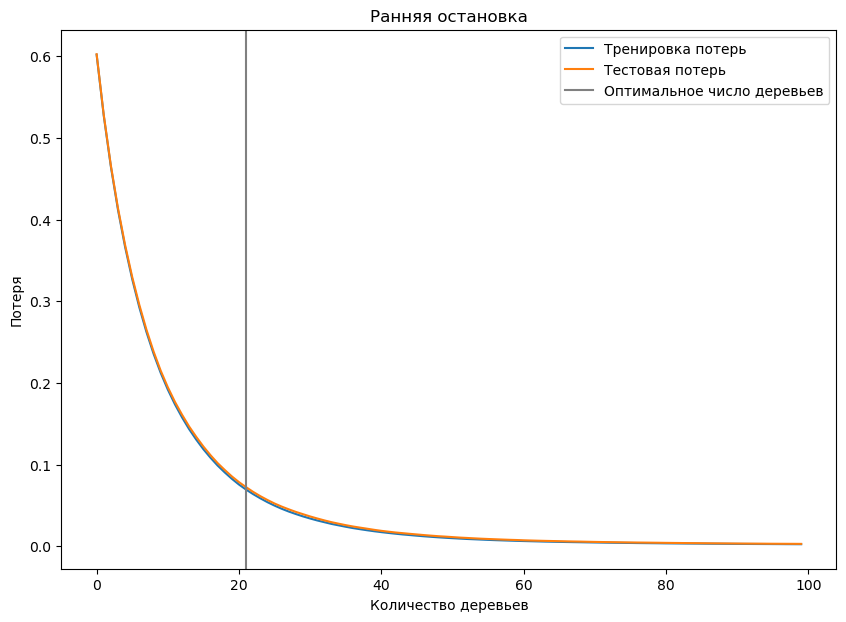

In [31]:
plt.figure(figsize=(10,7))
plt.title('Ранняя остановка')
plt.plot(results["validation_0"]["logloss"], label="Тренировка потерь")
plt.plot(results["validation_1"]["logloss"], label="Тестовая потерь")
plt.axvline(21, color="gray", label="Оптимальное число деревьев")
plt.xlabel("Количество деревьев")
plt.ylabel("Потеря")
plt.legend()

# 6. В выводах напишите, какая модель показала себя лучше всего, какого качества удалось достичь.

Самой лучшей моделью показала себя 
Случайный лес, с точностью 0.995, но не намного уступая градиентному бустинга с его точностью 0.994, 
при условии, что мы использовали больше дереьев
Для себя я сделал следующий вывод: Применять гиперпараметры нужно с умом и с осторожностью, 
а то порой более крутого результат можно добиться и более легкой моделью машинного обучения)